In [1]:
from domains import Waveguide, ScattererShape, ScattererType

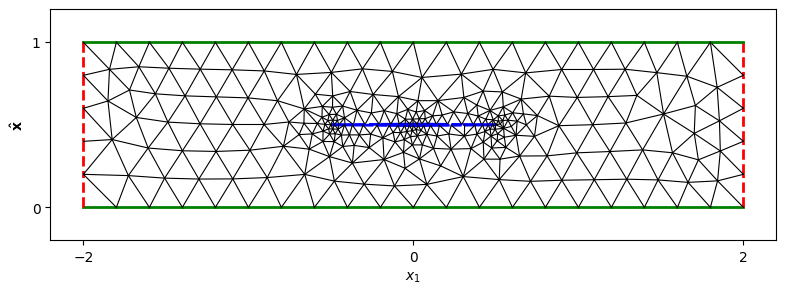

In [5]:
H = 1 
R = 2
domain = Waveguide(H=H,R=R)
domain.add_scatterer(scatterer_shape=ScattererShape.DIAMOND, scatterer_type=ScattererType.SOUND_SOFT, params=([0,0.5],1,0.01))
domain.generate_mesh(h_max=0.2)
domain.plot_mesh()

In [10]:
import numpy as np 
from Trefft_tools import TrefftzSpace, Assemble_blockMatrix, AssembleRHS
Nth = 15
th_0 = np.e/np.pi
kappa = 16.
N = 1.
V = TrefftzSpace(Domain=domain, DOF_per_element=Nth, kappa=kappa, n= {"Omega_i" : N, "Omega_e" : 1}, th0=th_0 )
N_modes = 15 #Number of modes for the DtN map
# "UWVF" parameters
a = 0.5
b = 0.5
d_1 = 0.5
d_2 = 0.5
A_block = Assemble_blockMatrix(V=V, Edges=domain.Edges, th_0=th_0, H=H, k=kappa, N_p=Nth, a=a, b=b, d_1=d_1, d_2=d_2, N_DtN=N_modes)

NDOF = A_block.shape[0]

In [11]:
t = 0
B = AssembleRHS(V, domain.Edges, kappa, H, d_2=d_2, t = t)
from Trefft_tools import TrefftzFunction
#this should be a "solve system"
from scipy.sparse.linalg import spsolve 
A = A_block.tocsc()
DOFs = spsolve(A,B)
f = TrefftzFunction(V,DOFs)

In [12]:
Ny = 50
Nx = 10*Ny
x = np.linspace(-R,R,Nx)
y = np.linspace(0,H,Ny)
X, Y = np.meshgrid(x,y)
u_Trefft =  np.reshape([ f(x_, y_) for x_, y_ in zip( X.ravel(), Y.ravel()) ], [Ny,Nx])

<Axes: xlabel='$x_1$', ylabel='$\\mathbf{\\hat{x}}$'>

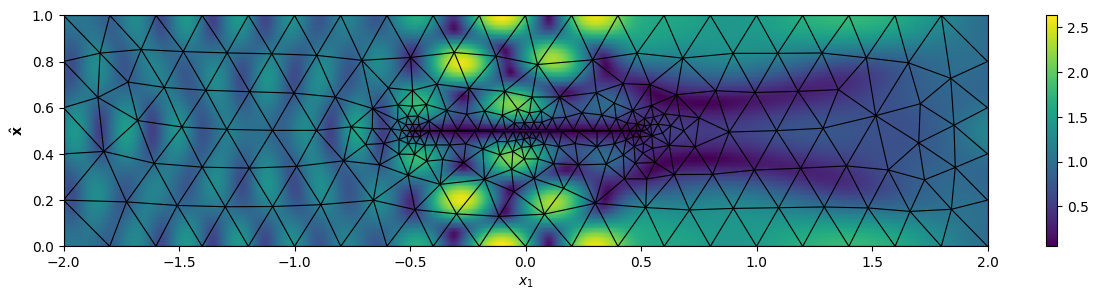

In [13]:
domain.plot_field(X,Y,np.abs(u_Trefft), show_edges=True)